# Import the required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sms


from sklearn.linear_model import LogisticRegression


# Load the Data


In [5]:
data= pd.read_csv(r'C:\Users\user\Desktop\IBM Attrition Data.csv')
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [6]:
data.columns.values

array(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'], dtype=object)

In [7]:
data.describe(include='all')

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,NaN,6,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,No,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Married,NaN,NaN,NaN,NaN
freq,NaN,1233,961,NaN,NaN,606,NaN,NaN,673,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,9.192517,2.912925,NaN,2.721769,2.728571,NaN,6502.931293,2.693197,2.761224,7.008163
std,9.135373,NaN,NaN,8.106864,1.024165,NaN,1.093082,1.102846,NaN,4707.956783,2.498009,0.706476,6.126525
min,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,2.000000,NaN,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,NaN,NaN,7.000000,3.000000,NaN,3.000000,3.000000,NaN,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,NaN,NaN,14.000000,4.000000,NaN,4.000000,4.000000,NaN,8379.000000,4.000000,3.000000,9.000000



# histogram for Age

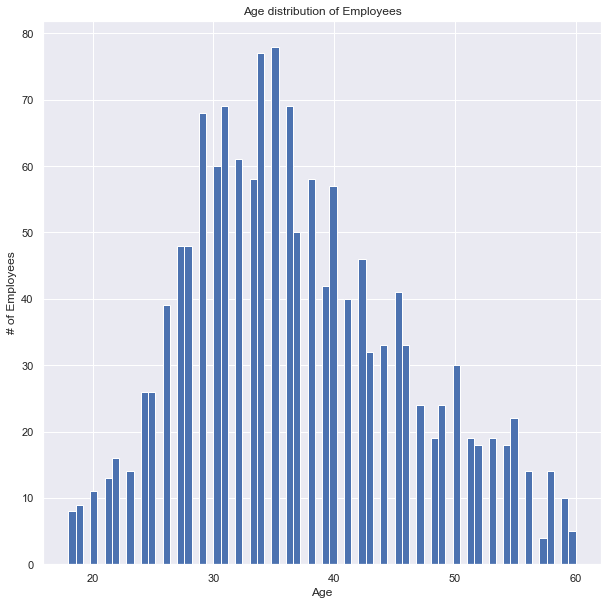

In [5]:
plt.figure(figsize=(10,10))
plt.hist(data['Age'],bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

# Attrition by Age 

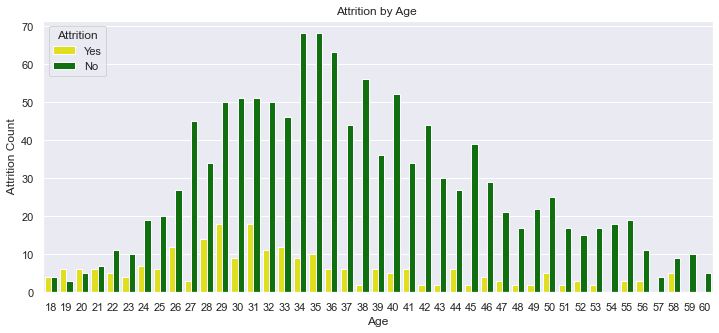

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x='Age',hue='Attrition',data=data,palette=['yellow','green'])
plt.title("Attrition by Age ")
plt.ylabel(" Attrition Count")
plt.xlabel("Age")
plt.show()

# Data for Attrition of  employees

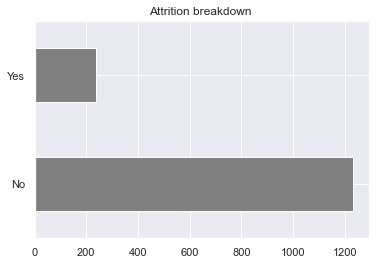

In [7]:
data["Attrition"].value_counts().plot(kind='barh',color='Grey')
plt.title("Attrition breakdown ")
plt.show()



# Education  field

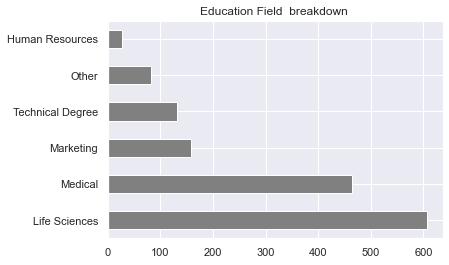

In [8]:
data['EducationField'].value_counts().plot(kind='barh',color='Grey')
plt.title("Education Field  breakdown ")
plt.show()

# Marital status

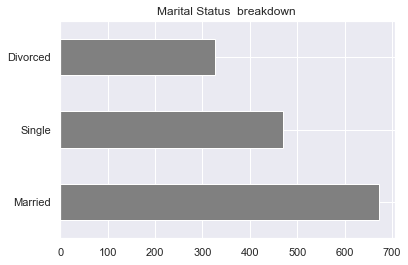

In [9]:
data['MaritalStatus'].value_counts().plot(kind='barh',color='Grey')
plt.title("Marital Status  breakdown ")
plt.show()

# data type and their unique values

In [10]:
for i in data.columns:
    if data[i].dtype==object:
        print(str(i)+' : '+str(data[i].unique()))
        print(data[i].value_counts())
        print('-----------------------------------------------------------------------')
        

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
-----------------------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-----------------------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-----------------------------------------------------------------------
MaritalStatus : ['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
-----------------------------------------------------------------------


In [10]:
data['Attrition']=data['Attrition'].map({'Yes':1,'No':0})


In [11]:
data['Department']=data['Department'].map({'Sales':1,'Research & Development':2,'Human Resources':3})


In [12]:
data['EducationField']=data['EducationField'].map({'Life Sciences':1,'Medical':2,'Marketing':3,'Other':4,'Technical Degree':5,'Human Resources':6})

In [13]:
data['MaritalStatus']=data['MaritalStatus'].map({'Married':1,'Single':2,'Divorced':3})

In [14]:
data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,1,1,2,1,2,4,2,5993,8,1,6
1,49,0,2,8,1,1,3,2,1,5130,1,3,10
2,37,1,2,2,2,4,4,3,2,2090,6,3,0
3,33,0,2,3,4,1,4,3,1,2909,1,3,8
4,27,0,2,2,1,2,1,2,1,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,23,2,2,3,4,1,2571,4,3,5
1466,39,0,2,6,1,2,4,1,1,9991,4,3,7
1467,27,0,2,4,3,1,2,2,1,6142,1,3,6
1468,49,0,1,2,3,2,4,2,1,5390,2,2,9


# Creating Logistic Regression

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x = data.drop(['Attrition'],axis=1)
y = data['Attrition']

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=0)

In [78]:
logit=LogisticRegression()
logit.fit(x_train,y_train)

F:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
logit.score(x_train,y_train)

0.8458049886621315

In [80]:
logit.intercept_

array([0.0131115])

In [84]:
logit.coef_.round(3)

array([[-0.025, -0.074,  0.032,  0.008,  0.22 , -0.188, -0.194,  0.017,
        -0.   ,  0.097, -0.089, -0.025]])

# predicting the value for x_test

In [86]:
predict=logit.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(y_test,predict).round(3)

0.823